In [61]:
import numpy
import keras.models
import keras.layers
import keras.datasets
import keras.utils

import matplotlib.pyplot

In [62]:
# load data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [63]:
# 28 x 28 matrix
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

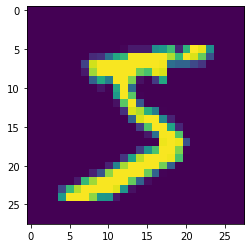

In [64]:
#plot the first image in the dataset
matplotlib.pyplot.imshow(X_train[0])

In [65]:
X_train[0].shape

(28, 28)

In [66]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [67]:
#one-hot encode target column
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [68]:
# array with 10 columns for one hot encoding
y_train.shape

(60000, 10)

In [69]:
#create model
model = keras.models.Sequential()

#add model layers

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))

# connect convolution layers to a normal Dense layer by flattening
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

In [70]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 107s 2ms/step - loss: 0.1261 - accuracy: 0.9629 - val_loss: 0.0498 - val_accuracy: 0.9834
Epoch 2/2
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.0451 - val_accuracy: 0.9854


In [90]:
#predict first 4 images in the test set
model.predict(X_test[0:1,])

array([[6.4319203e-11, 5.7314098e-13, 2.8606812e-06, 4.0480809e-06,
        6.5573749e-12, 4.4118659e-10, 1.9688618e-16, 9.9998879e-01,
        7.2912378e-08, 4.1661383e-06]], dtype=float32)

In [103]:
# cross entropy loss and accuracy
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 319us/step


[0.04512435096125118, 0.9854000210762024]

In [101]:
#actual results for first 4 images in test set
for n in range(10):
    print('Prediction:{}, Actual:{}'.format(
        numpy.argmax(y_test[n]),
        numpy.argmax(model.predict(X_test[n:n+1,]))
    ))

Prediction:7, Actual:7
Prediction:2, Actual:2
Prediction:1, Actual:1
Prediction:0, Actual:0
Prediction:4, Actual:4
Prediction:1, Actual:1
Prediction:4, Actual:4
Prediction:9, Actual:9
Prediction:5, Actual:5
Prediction:9, Actual:9
